In [1]:
# Download data from GitHub
!pip install wget -qU
import wget
import os.path

def download_from_our_github_repo(file_path, force_new_download=False):
  if force_new_download and os.path.isfile(file_path):
    os.remove(file_path)
  if force_new_download or not os.path.isfile(file_path):
      url = f"https://github.com/ko-redtruck/facial-landmark-detection/raw/main/{file_path}"  
      wget.download(url, ".")

## Download helper functions


In [2]:
download_from_our_github_repo('project-submission/data_loading.py')
download_from_our_github_repo('project-submission/data_visualisation.py')
download_from_our_github_repo('project-submission/train.py')


## Load data & process data

Each image is randomly resized, repositioned and rotated. Changes in brightness, sharpness, hue and colors are also randomized. The empty space resulting from geometric transformations are filled with noise, a random solid color or the pixels from the edge.

30


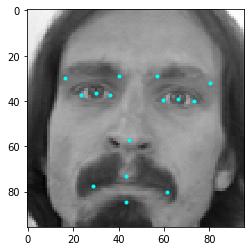

30


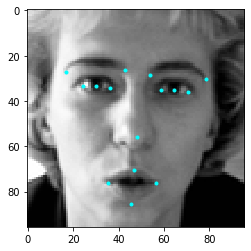

30


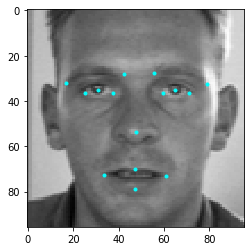

30


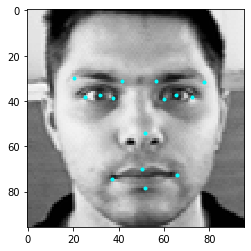

30


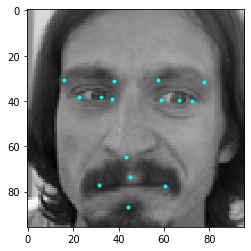

Downloaded dataset and extracted images & labels
Final image shape: torch.Size([3, 224, 224])
30


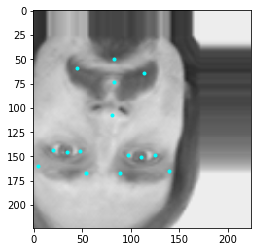

30


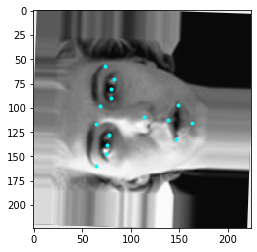

30


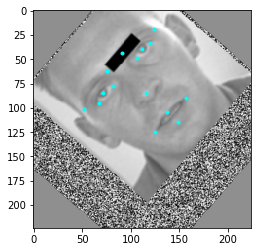

30


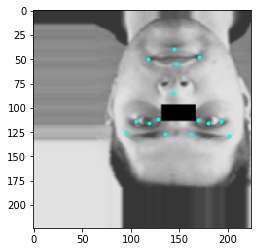

30


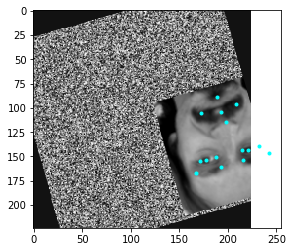

Preprocessed and augmented data


In [3]:
from data_loading import get_facial_landmark_detection_data, preprocess_data
from data_visualisation import plot_images

images, labels = get_facial_landmark_detection_data('./data')
plot_images(images, labels, num=5)
print('Downloaded dataset and extracted images & labels')

preprocessed_images, preprocessed_labels = preprocess_data(images, labels, target_size=(224, 224),
                  dataset_multiplier=2,
                  max_crop_length=30, display_samples=False)
plot_images(preprocessed_images, preprocessed_labels, num=5)
print('Preprocessed and augmented data')

## Load our best pretrained model

Please upload the files both model files from https://drive.google.com/drive/folders/13vn49AXvIuQvwhzh9xFZueLjGpKQNTn6 to your runtime first.

In [4]:
download_from_our_github_repo('project-submission/net_loading.py', force_new_download=True)

from torchvision.models import resnet18, resnet34, ResNet18_Weights, ResNet34_Weights
import torch
import torch.nn as nn

def add_final_layer(network, layer):
    network.fc = layer
    return network

def load_net(net: str, net_artifact: str, device):
    
    return torch.load(net_artifact, map_location=device)
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

NET_ARCHITECURE = 'ResNet18'

if NET_ARCHITECURE == 'ResNet34':
  net = load_net('ResNet34','ResNet34(v12).pickle', device)
elif NET_ARCHITECURE == 'ResNet18':
  net = load_net('ResNet18','ResNet18(v20).pickle', device)

net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Load & predict demo video

We have provided a test video file but you can upload any mp4 videos to test the model.

In [11]:
download_from_our_github_repo('matthis_vid_v1.mp4')
download_from_our_github_repo('project-submission/video_processing.py')
download_from_our_github_repo('project-submission/prediction.py',force_new_download=True)

#from video_processing import extract_frames_from, opencv_to_pil_image, opencv_images_to_video, pil_to_opencv_image
#from prediction import predict_and_draw_facial_landmarks

import torch
from PIL import ImageDraw
from torchvision import transforms
import cv2
def predict_facial_landmarks(*pil_images, net):
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(224)
    ])

    tensor_images = [preprocess(image.convert('L').convert('RGB')) for image in pil_images]
    image_batch = torch.stack(tensor_images, dim=0).to(device)
    net.eval()
    labels = net(image_batch)
    return labels.cpu().detach().numpy()


def add_labeling_to_images(*pil_images, labels):
    labelled_images = []
    for image, labeling in zip(pil_images, labels):
        draw = ImageDraw.Draw(image)
        points = zip(labeling[:-1:2], labeling[1::2])

        for point in points:
            x, y = point
            radius = 1
            upper_left_point = (x - radius, y - radius)
            lower_right_point = (x + radius, y + radius)
            draw.ellipse((upper_left_point, lower_right_point), fill=(255, 0, 0))
        labelled_images.append(image)
        
    return labelled_images


def predict_and_draw_facial_landmarks(*pil_images, net):
    resized_images = [transforms.functional.center_crop(image, [224]) for image in pil_images]
    labels = predict_facial_landmarks(resized_images, net=net)
    labelled_images = add_labeling_to_image(resized_image, labels=labeling)
    return labelled_image
Test_video_file = 'matthis_vid_v1.mp4'

frames = [opencv_to_pil_image(opencv_image) for opencv_image in extract_frames_from(Test_video_file)]

predicted_landmarks = predict_and_draw_facial_landmarks(frames,net=net)
opencv_images_to_video([pil_to_opencv_image(pil_image) for pil_image in frames],'video_predicted.mp4')



NameError: ignored

In [47]:
download_from_our_github_repo('matthis_vid_v1.mp4')
download_from_our_github_repo('project-submission/video_processing.py')
download_from_our_github_repo('project-submission/prediction.py',force_new_download=True)

#from video_processing import extract_frames_from, opencv_to_pil_image, opencv_images_to_video, pil_to_opencv_image
#from prediction import predict_and_draw_facial_landmarks

import torch
from PIL import ImageDraw
from torchvision import transforms
import cv2
from datetime import timedelta
import numpy as np
from PIL import Image, ImageDraw
def predict_facial_landmarks(*pil_images, net):
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(224)
    ])

    tensor_images = [preprocess(image.convert('L').convert('RGB')) for image in pil_images]
    image_batch = torch.stack(tensor_images, dim=0).to(device)
    net.eval()
    labels = net(image_batch)
    return labels.cpu().detach().numpy()


def add_labeling_to_images(*pil_images, labels):
    labelled_images = []
    for image, labeling in zip(pil_images, labels):
        draw = ImageDraw.Draw(image)
        points = zip(labeling[:-1:2], labeling[1::2])

        for point in points:
            x, y = point
            radius = 1
            upper_left_point = (x - radius, y - radius)
            lower_right_point = (x + radius, y + radius)
            draw.ellipse((upper_left_point, lower_right_point), fill=(255, 0, 0))
        labelled_images.append(image)
        
    return labelled_images


def predict_and_draw_facial_landmarks(*pil_images, net):
    resized_images = [transforms.functional.center_crop(image, [224]) for image in pil_images]
    labels = predict_facial_landmarks(*resized_images, net=net)
    labelled_images = add_labeling_to_images(*resized_images, labels=labels)
    return labelled_images


Saving_frames_per_second = 30
import cv2

def format_timedelta(td):
    """Utility function to format timedelta objects in a cool way (e.g 00:00:20.05) 
    omitting microseconds and retaining milliseconds"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return result + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")

def get_saving_frames_durations(cap, saving_fps):
    """A function that returns the list of durations where to save the frames"""
    s = []
    # get the clip duration by dividing number of frames by the number of frames per second
    clip_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    # use np.arange() to make floating-point steps
    for i in np.arange(0, clip_duration, 1 / saving_fps):
        s.append(i)
    return s

def extract_frames_from(video_file):
  # read the video file    
  cap = cv2.VideoCapture(video_file)

  # Check if camera opened successfully
  if(cap.isOpened()== False):
	  print("Error opening video stream or file")
  # get the FPS of the video
  fps = cap.get(cv2.CAP_PROP_FPS)
  # if the SAVING_FRAMES_PER_SECOND is above video FPS, then set it to FPS (as maximum)
  saving_frames_per_second = min(fps, Saving_frames_per_second)
  # get the list of duration spots to save
  saving_frames_durations = get_saving_frames_durations(cap, saving_frames_per_second)
  # start the loop
  count = 0
  frames = []
  while True:
      is_read, frame = cap.read()
      if not is_read:
          # break out of the loop if there are no frames to read
          break
      # get the duration by dividing the frame count by the FPS
      frame_duration = count / fps
      try:
          # get the earliest duration to save
          closest_duration = saving_frames_durations[0]
      except IndexError:
          # the list is empty, all duration frames were saved
          break
      if frame_duration >= closest_duration:
          # if closest duration is less than or equals the frame duration, 
          # then save the frame
          frame_duration_formatted = format_timedelta(timedelta(seconds=frame_duration))
          #cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
          ## drop the duration spot from the list, since this duration spot is already saved
          frames.append(frame)
          try:
              saving_frames_durations.pop(0)
          except IndexError:
              pass
      # increment the frame count
      count += 1
  return frames


def opencv_to_pil_image(opencv_image):
  color_coverted = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
  pil_image=Image.fromarray(color_coverted)
  return pil_image

def pil_to_opencv_image(pil_image):
  np_image=np.array(pil_image)  

  # convert to a openCV2 image, notice the COLOR_RGB2BGR which means that 
  # the color is converted from RGB to BGR format
  opencv_image=cv2.cvtColor(np_image, cv2.COLOR_RGB2BGR)
  return opencv_image

def opencv_images_to_video(opencv_images,video_filename):
  height, width, layers = opencv_images[0].shape
  image_size = (width, height)

  out = cv2.VideoWriter(video_filename, cv2.VideoWriter_fourcc(*'MP4V'), Saving_frames_per_second, image_size)
  for frame in opencv_images:
    out.write(frame)
  out.release()
Test_video_file = 'matthis_vid_v1.mp4'

frames = [opencv_to_pil_image(opencv_image) for opencv_image in extract_frames_from(Test_video_file)]

predicted_landmarks = predict_and_draw_facial_landmarks(*frames,net=net)
opencv_images_to_video([pil_to_opencv_image(pil_image) for pil_image in predicted_landmarks],'video_predicted.mp4')


In [54]:
from IPython.display import HTML
from base64 import b64encode
import os

def display_video_in_notebook(video_file):
  video_file_name = video_file.replace('.mp4','')
  compressed_path = f'{video_file_name}-compressed.mp4'
  os.system(f"ffmpeg -i {video_file} -vcodec libx264 {compressed_path}")
  mp4 = open(compressed_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width=600 controls loop autoplay>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

In [34]:
display_video_in_notebook('video_predicted.mp4')

## webcam Video streaming

In [45]:
import cv2
from IPython.display import display, Javascript
from IPython.display import Image as IPythonImage
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import sys

# Function implemented in JavaScript to properly stream video in a canvas using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [57]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
counter = 0
webcam_frames = []
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

 
    # convert JS response to OpenCV Image
    
    img = js_to_image(js_reply["img"])
    pil_img = opencv_to_pil_image(img)
    webcam_frames.append(pil_img)
    
    counter+=1
    if counter == 10:
      break
    print(counter)

predicted_landmarks = predict_and_draw_facial_landmarks(*webcam_frames,net=net)
opencv_images_to_video([pil_to_opencv_image(pil_image) for pil_image in predicted_landmarks],'video_predicted_webcam.mp4')
display_video_in_notebook('video_predicted_webcam.mp4')

<IPython.core.display.Javascript object>

1
2
3
4
5
6
7
8
9
